In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [2]:
freq = 130 # fundamental
duration = 4.0
sample_rate = 44100
time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False) # time vector

# harmonics
As =   [ 1.0, 0.0, 0.7, 0.0, 0.8, 0.0, 0.6 ]
phis = [ 0,   0,   0,   0,   0,   0,   0   ]

y = (lambda n, t: As[n-1] * np.sin(2 * np.pi * n * freq * t + phis[n-1]))

harmonic_waves = []
for n in range(1, len(As) + 1):
    harmonic_waves.append(y(n, time))
    for t in range(len(time)):
        harmonic_waves[n-1][t] = As[n-1] * np.sin(2 * np.pi * n * freq * time[t] + phis[n-1])
    # harmonic_waves[n-1] /= np.max(np.abs(harmonic_waves[n-1])) # normalize

samples_out = np.zeros_like(time) # combined output signal

# generate signals
for t in range(len(samples_out)):
    y_total = 0
    for n in range(1, len(As) + 1):
        y_total += y(n, time[t])
    samples_out[t] = y_total

# normalize
samples_out /= np.max(np.abs(samples_out))

In [3]:
sd.play(samples_out, samplerate=sample_rate)

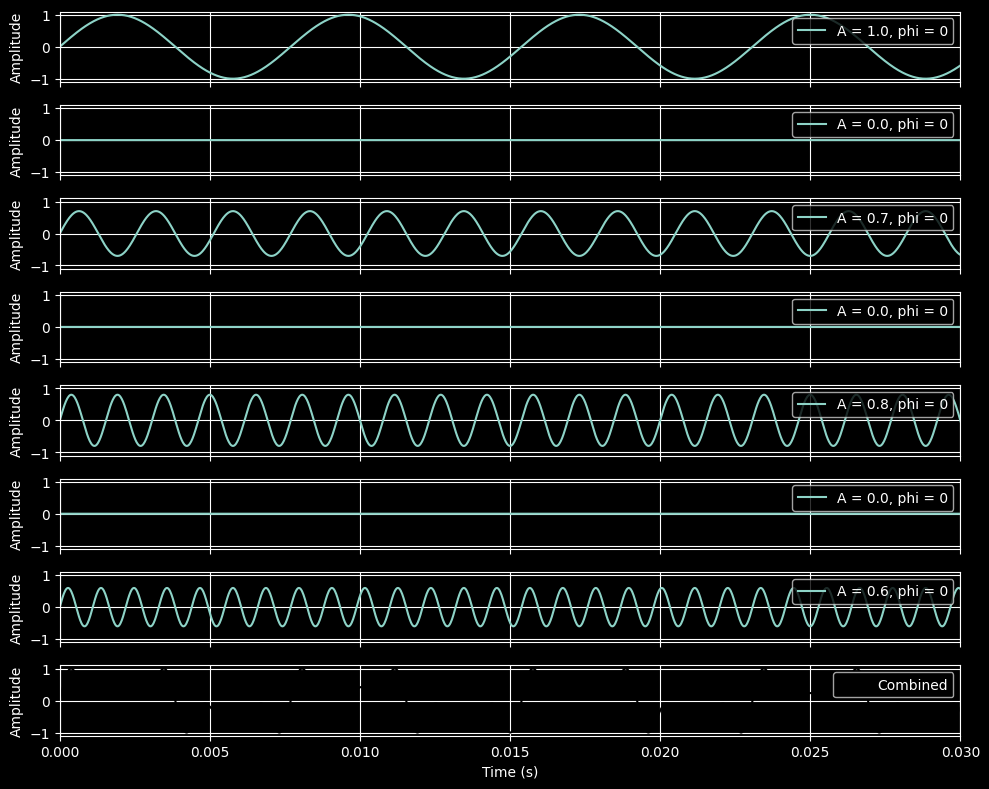

In [4]:
fig, axes = plt.subplots(len(harmonic_waves) + 1, 1, figsize=(10, 8), sharex=True)
window = 0.03

# Plot each harmonic waveform
for i, wave in enumerate(harmonic_waves):
    axes[i].plot(time, wave, label=f'A = {As[i]}, phi = {phis[i]}')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)
    axes[i].set_ylim(-max(As) * 1.1, max(As) * 1.1)
    axes[i].set_xlim(0, window)  # Set x-axis limits for zoomed-in view

# Plot the combined waveform at the bottom
axes[-1].plot(time, samples_out, label='Combined', color='black')
axes[-1].set_xlabel('Time (s)')
axes[-1].set_ylabel('Amplitude')
axes[-1].legend(loc='upper right')
axes[-1].grid(True)
axes[-1].set_xlim(0, window)  # Set x-axis limits for zoomed-in view

plt.tight_layout()
plt.show()